In [16]:
from pulp import *

def shortest_path_LP(dist, spot, start, end):
    if start == end:
        return [], 0
    else:
        # The cost data is made into a dictionary
        dist = makeDict([spot, spot], dist, 0)
        Routes = [(out, enter) for out in spot for enter in spot]

        # Linear programming---------------------------------------------------------------------------------------------
        prob = LpProblem("Shortest Path Problem", LpMinimize)
        var = LpVariable.dicts('Route', (spot, spot), lowBound=0, upBound=1, cat='Integer')

        # Constraints
        for o in spot:
            if o == start:
                prob += lpSum(var[o][e]-var[e][o] for e in spot) == 1
            elif o == end:
                prob += lpSum(var[o][e]-var[e][o] for e in spot) == -1
            else:
                prob += lpSum(var[o][e]-var[e][o] for e in spot) == 0

        # Objective function
        prob += lpSum(var[out][enter] * dist[out][enter] for (out, enter) in Routes)
        prob.solve()
        #----------------------------------------------------------------------------------------------------

        minValue = value(prob.objective)  # Optimal solution

        # obtain all the paths which varValue=1 
        vList = [] 
        for v in prob.variables():
            if v.varValue == 1:
                pointFROM = v.name.split('_')[1]
                pointTO = v.name.split('_')[2]
                vList.append([v.name, v.varValue, pointFROM, pointTO])        

        return vList, minValue


# Sorting    
def sort(vlst, sList):
    for i in vlst:
        if i[0] == sList[-1]:
            sList.append(i[1])
            return sort(vlst, sList)
        

In [17]:
import random
import numpy as np

n = 100   # number of points 
dimension = 2    
ptXY = np.random.randint(0, 200, size=[dimension, n])  # randomly generate n points

print(ptXY)

[[138  78  17 147  41 150 191 115 197 151 157  93 154  43  44 112 102 139
   99  27 171 146 103 168 109 132  31 191 174  73 171 183   3 189  74 122
   88 172 114 183  52  42 120 108 179 161  70 195   1 159 170  68  59 163
   97 108  68  93 164 139 131 144 143 184 175   7  56 162  80  76  63  24
  138 127  75 170 182  47 178  95  36 115 162 121 166  11  57  59 102  44
   44  54  40  63  60 129 155  29  71  17]
 [173  76  39  43  69  35 124  92  96  48 108  58  60  52 167 115 148  30
  151 163 190  85 105 148  23  23  48 130  68  30  85 167 191  88   6 124
  112  96 107  67  64  84   7 186  56 190 196  75 169 122  58 135 191 143
  155 101 162 174 159 109  90 157 139  80  34 125 128  79  10  98  17 186
   21 143  38  99 147  38  76  44 173 164  80  30  38  72 131 105 163  24
   69 109 153  17 140  77   1  53 107  67]]


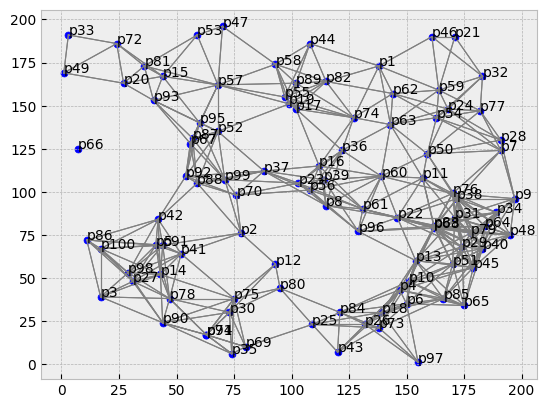

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

epsilon = 35     # identify epsilon
inf = 9999

distMtx = np.zeros((n,n), dtype=float) # distance matrix

for i in range(n):
    for j in range(n):
        distance=0
        for d in range(dimension):
            distance += (ptXY[d][i]-ptXY[d][j])**2  
        distance = distance**0.5   # the distance between 2 points

        if distance <= epsilon:   
            if distance == 0:
                distMtx[i][j] = round(inf, 0)
            else:
                distMtx[i][j] = round(distance, 2)
        else:
            distMtx[i][j] = round(inf, 0)

x, y, = ptXY[0], ptXY[1] 

plt.style.use('bmh')   # grid lines
fig = plt.figure()
ax = plt.axes()        # scale
plt.scatter(x, y, s=25, color='b') 
    
# adjacent lines    
for i in range(n):
    for j in range(n):
        if distMtx[i][j] <= epsilon:
            if distMtx[i][j] > 0:
                X = [ptXY[0][i], ptXY[0][j]]
                Y = [ptXY[1][i], ptXY[1][j]]
                plt.plot(X, Y, color='#808080', linewidth=0.8)
                
# point name
ptName = (['p{}'.format(i+1) for i in range(n)])
for i in range(n):
    ax.annotate(ptName[i], (ptXY[0][i], ptXY[1][i]))

#print(distMtx)
#plt.savefig('C:\\Users\\')

c:\Users\johnn\AppData\Local\Programs\Python\Python311\Lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Route_p12_p80 = 1.0
Route_p26_p97 = 1.0
Route_p2_p12 = 1.0
Route_p33_p72 = 1.0
Route_p67_p99 = 1.0
Route_p72_p81 = 1.0
Route_p80_p84 = 1.0
Route_p81_p93 = 1.0
Route_p84_p26 = 1.0
Route_p93_p67 = 1.0
Route_p99_p2 = 1.0
The distance of the shortest path : 258.92
Shortest Path: p33 p72 p81 p93 p67 p99 p2 p12 p80 p84 p26 p97 

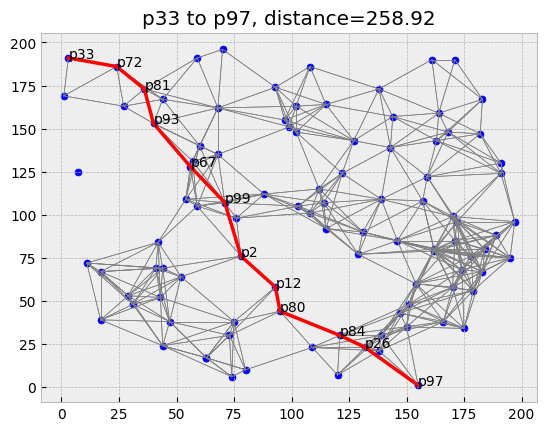

In [22]:
start, end = 'p33', 'p97'

vData, result = shortest_path_LP(distMtx, ptName, start, end)

for v in vData:
    if v[1] != 0:
        print (v[0], "=", v[1])
        
# order the path
sortedList = [start]
varlist=[]
for v in vData:
    varlist.append([v[2], v[3]])
sort(varlist, sortedList)     

if result >= inf:
    print ('The distance of the shortest path : none')
    print('There is no shortest path')
else:
    print ('The distance of the shortest path :', result)
    print('Shortest Path:', end = ' ')
    for i in sortedList:
        print(i,end = " ") 

#----------------------------plot-----------------------------------------    
plt.style.use('bmh')
ax = plt.axes() 
plt.title('{} to {}, distance={}'.format(start,end,round(result,2)))
#plt.figure(figsize=(8, 6)) 
plt.scatter(x, y, s=25, color='b')

# adjacent lines    
for i in range(n):
    for j in range(n):
        if distMtx[i][j] <= epsilon:
            if distMtx[i][j] > 0:
                X=[ptXY[0][i],ptXY[0][j]]
                Y=[ptXY[1][i],ptXY[1][j]]
                plt.plot(X,Y, color='#808080', linewidth=0.5)     

# point names
for i in sortedList:
    p = int(i.strip('p')) -1
    ax.annotate(i,(ptXY[0][p], ptXY[1][p]))  


# shortest path
if result < inf:    
    for k in varlist:
        p = int(k[0].strip('p')) -1      
        q = int(k[1].strip('p')) -1
        X = [ptXY[0][p],ptXY[0][q]]
        Y = [ptXY[1][p],ptXY[1][q]]
        plt.plot(X,Y, color='r', linewidth=2.5)


In [ ]:
# generate gif file

for r in range(10):
    for s in range(20):
        start = ptName[r]
        end = ptName[s]
        vData, result = shortest_path_LP(distMtx, ptName, start, end)
      
        #選定起點、終點，做排序
        sortedList = [start]
        varlist = []
        for v in vData:
            varlist.append([v[2], v[3]])
        sort(varlist, sortedList)      

        #-----------------plot--------------------    
        fig, ax = plt.subplots()
        plt.style.use('bmh')
        ax = plt.axes() 
        plt.title('{} to {}, distance={}'.format(start, end, round(result, 2)))
        #plt.figure(figsize=(8, 6)) 
        plt.scatter(x, y, s=25, color='b')

        for i in range(n):
            for j in range(n):
                if distMtx[i][j] <= epsilon:
                    if distMtx[i][j] > 0:
                        X = [ptXY[0][i], ptXY[0][j]]
                        Y = [ptXY[1][i], ptXY[1][j]]
                        plt.plot(X, Y, color='#808080', linewidth=0.5)     

        for i in sortedList:
            p = int(i.strip('p')) -1
            ax.annotate(i,(ptXY[0][p], ptXY[1][p]))  

        if result < inf:    
            for k in varlist:
                p = int(k[0].strip('p')) -1      
                q = int(k[1].strip('p')) -1
                X = [ptXY[0][p], ptXY[0][q]]
                Y = [ptXY[1][p], ptXY[1][q]]
                plt.plot(X,Y, color='r', linewidth=2)
                
        #plt.savefig('C:\\Users\\johnny\\Desktop\\python\\pic\\{}to{}.png'.format(start,end))

In [ ]:
import pandas as pd

#每點之間最短距離矩陣
shortestDist = np.zeros((n,n), dtype=float) 

for i in range(n):
    for j in range(n):
        start = spot[i]
        end = spot[j]
        vData, result = shortest_path_LP(distMtx,spot,start,end)
        if result == inf:
            shortestDist[i][j] = round(0,0)
        else:
            shortestDist[i][j] = round(result, 3)
        
print(shortestDist)

df = pd.DataFrame(shortestDist)
print(df)